In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install umap-learn
!pip install cartopy

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.io.img_tiles import OSM
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from umap import UMAP  # Assurez-vous d'avoir la bibliothèque umap-learn installée

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
directory = "/content/gdrive/MyDrive/Valeurs acoustiques/2022/Antras_Isard/"
# directory = "/content/gdrive/MyDrive/Valeurs acoustiques/2022/Ustou_Guzet-Neige/"

In [ ]:
csv_file_path = os.path.join(directory, 'Antras_IsardL_E_B_R_vggish_indices.csv')
# csv_file_path = os.path.join(directory, 'Ustou_Guzet-NeigeL_E_B_R_vggish_indices.csv')

In [ ]:
df = pd.read_csv(csv_file_path)
df.head(2).T

,0,1
Unnamed: 0,0,1
station_name,2022/Antras_Isard/SM7113_235L_Rouge/Data/,2022/Antras_Isard/SM7113_235L_Rouge/Data/
file_name,SMA07113_20220531_174020.wav,SMA07113_20220531_181002.wav
V1,18,0
V2,196,218
...,...,...
V126,70,0
V127,255,255
V128,221,248
dynamique,Rouge,Rouge


In [ ]:
df_fn_sn = df[['file_name', 'station_name']].copy()

df.drop(columns=["Unnamed: 0", "file_name", "station_name"], inplace= True)

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Instancier LabelEncoder
label_encoder = LabelEncoder()

# Initialiser un dictionnaire pour stocker les correspondances
label_mapping = {}

# Appliquer LabelEncoding aux colonnes qualitatives
qualitative_cols = ['dynamique', 'position']
for col in qualitative_cols:
    df[col] = label_encoder.fit_transform(df[col])
    # Stocker les correspondances dans le dictionnaire
    label_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Afficher le dictionnaire de correspondance
print("Dictionnaire de correspondance des labels :")
for col, mapping in label_mapping.items():
    print(f"{col}: {mapping}")

# Afficher le DataFrame après les modifications
print("\nDataFrame après les modifications :")
df.head(2).T

Dictionnaire de correspondance des labels :
dynamique: {'Bleu': 0, 'Rouge': 1}
position: {'E': 0, 'L': 1}

DataFrame après les modifications :


,0,1
V1,18,0
V2,196,218
V3,78,93
V4,13,11
V5,31,16
...,...,...
V126,70,0
V127,255,255
V128,221,248
dynamique,1,1


In [ ]:
df_dy_po = df[['dynamique', 'position']].copy()

df_dy_po

,dynamique,position
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
800,0,1
801,0,1
802,0,1
803,0,1


In [ ]:
df.drop(columns=["dynamique", "position"], inplace= True)

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128
0,18,196,78,13,31,46,255,158,255,88,...,175,255,0,255,163,255,0,70,255,221
1,0,218,93,11,16,36,255,153,255,58,...,233,247,65,255,200,255,0,0,255,248
2,52,158,83,14,61,20,224,156,251,80,...,118,29,17,204,117,207,0,113,255,255
3,0,223,64,41,0,3,255,137,255,42,...,165,127,0,255,255,255,0,1,255,127
4,19,158,107,0,97,146,104,200,255,114,...,249,248,89,153,255,142,109,228,108,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,11,162,113,0,109,81,236,142,255,163,...,0,174,254,138,193,133,125,188,255,151
801,19,154,156,0,161,127,166,170,255,135,...,90,211,235,83,172,69,126,244,202,181
802,31,138,160,0,184,128,145,172,241,135,...,192,152,179,142,232,111,67,235,85,184
803,71,127,127,0,192,116,130,144,234,142,...,94,35,255,6,145,194,255,90,236,117


---

## Etude pour les NaN



In [ ]:
# Vérifier si merged_df contient des valeurs NaN
if df.isna().any().any():
    print("Le DataFrame contient des valeurs NaN.")
else:
    print("Le DataFrame ne contient pas de valeurs NaN.")

Le DataFrame ne contient pas de valeurs NaN.


In [ ]:
# Localiser les valeurs NaN dans merged_df
nan_locations = df.isna()

# Afficher les positions des valeurs NaN
print("Positions des valeurs NaN :")
print(nan_locations)

# Afficher les lignes contenant des valeurs NaN
nan_rows = df[nan_locations.any(axis=1)]
print("\nLignes contenant des valeurs NaN :")
nan_rows

Positions des valeurs NaN :
        V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
800  False  False  False  False  False  False  False  False  False  False   
801  False  False  False  False  False  False  False  False  False  False   
802  False  False  False  False  False  False  False  False  False  False   
803  False  False  False  False  False  False  False  False  False  False   
804  False  False  False  False  False  False  False  False  False  False   

     ...   V119   V120   V121   V122   V123   V

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128


In [ ]:
# Compter le nombre de NaN par colonne
nan_count = df.isna().sum()

# Afficher le nombre de NaN par colonne
print("Nombre de NaN par colonne :")
for feature, val in nan_count.items():
  print(feature, ":", val)

Nombre de NaN par colonne :
V1 : 0
V2 : 0
V3 : 0
V4 : 0
V5 : 0
V6 : 0
V7 : 0
V8 : 0
V9 : 0
V10 : 0
V11 : 0
V12 : 0
V13 : 0
V14 : 0
V15 : 0
V16 : 0
V17 : 0
V18 : 0
V19 : 0
V20 : 0
V21 : 0
V22 : 0
V23 : 0
V24 : 0
V25 : 0
V26 : 0
V27 : 0
V28 : 0
V29 : 0
V30 : 0
V31 : 0
V32 : 0
V33 : 0
V34 : 0
V35 : 0
V36 : 0
V37 : 0
V38 : 0
V39 : 0
V40 : 0
V41 : 0
V42 : 0
V43 : 0
V44 : 0
V45 : 0
V46 : 0
V47 : 0
V48 : 0
V49 : 0
V50 : 0
V51 : 0
V52 : 0
V53 : 0
V54 : 0
V55 : 0
V56 : 0
V57 : 0
V58 : 0
V59 : 0
V60 : 0
V61 : 0
V62 : 0
V63 : 0
V64 : 0
V65 : 0
V66 : 0
V67 : 0
V68 : 0
V69 : 0
V70 : 0
V71 : 0
V72 : 0
V73 : 0
V74 : 0
V75 : 0
V76 : 0
V77 : 0
V78 : 0
V79 : 0
V80 : 0
V81 : 0
V82 : 0
V83 : 0
V84 : 0
V85 : 0
V86 : 0
V87 : 0
V88 : 0
V89 : 0
V90 : 0
V91 : 0
V92 : 0
V93 : 0
V94 : 0
V95 : 0
V96 : 0
V97 : 0
V98 : 0
V99 : 0
V100 : 0
V101 : 0
V102 : 0
V103 : 0
V104 : 0
V105 : 0
V106 : 0
V107 : 0
V108 : 0
V109 : 0
V110 : 0
V111 : 0
V112 : 0
V113 : 0
V114 : 0
V115 : 0
V116 : 0
V117 : 0
V118 : 0
V119 : 0
V120 : 0


In [ ]:
# # Remplacer les NaN par la moyenne de la colonne respective
# df['ACTtMean'].fillna(df['ACTtMean'].mean(), inplace=True)

# Remplacer les NaN par la moyenne de chaque colonne respective
df = df.apply(lambda col: col.fillna(col.mean()))

In [ ]:
# Vérifier si merged_df contient des valeurs NaN
if df.isna().any().any():
    print("Le DataFrame contient des valeurs NaN.")
else:
    print("Le DataFrame ne contient pas de valeurs NaN.")

Le DataFrame ne contient pas de valeurs NaN.


----

## Analyse non supervisée

In [ ]:
# # ACP
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(df)

# # t-SNE
# tsne = TSNE(n_components=2, perplexity=5)
# tsne_result = tsne.fit_transform(df)

# # uMAP
# umap_result = UMAP(n_components=2).fit_transform(df)

In [ ]:
# # -----------------
# df = pd.concat([df, df_dy_po], axis=1)

In [ ]:
df["target"] = df_dy_po['dynamique'].astype(str) + df_dy_po['position'].astype(str)

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,795,796,797,798,799,800,801,802,803,804
V1,18,0,52,0,19,10,0,54,26,54,...,27,0,33,97,18,11,19,31,71,16
V2,196,218,158,223,158,182,169,146,165,152,...,179,188,139,121,142,162,154,138,127,144
V3,78,93,83,64,107,80,85,101,97,103,...,95,117,123,110,121,113,156,160,127,137
V4,13,11,14,41,0,40,0,38,40,28,...,46,0,38,0,4,0,0,0,0,0
V5,31,16,61,0,97,18,26,91,60,98,...,124,91,159,189,122,109,161,184,192,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V125,0,0,0,0,109,0,198,160,0,0,...,150,30,156,255,87,125,126,67,255,113
V126,70,0,113,1,228,164,255,160,166,43,...,58,255,220,255,255,188,244,235,90,255
V127,255,255,255,255,108,255,217,162,255,255,...,255,255,234,255,255,255,202,85,236,255
V128,221,248,255,127,255,151,255,0,179,191,...,49,224,141,0,173,151,181,184,117,126


In [ ]:
# dynamique: {'Bleu': 0, 'Rouge': 1}
# position: {'E': 0, 'L': 1}

dy_po = {'00':'Bleu-Estive', '01':'Bleu-Lisiere', '10':'Rouge-Estive','11':'Rouge-Lisiere'}

In [ ]:
# Supposons que dy_po est la fonction de mappage des classes et df est votre DataFrame

# Remplacement des codes par les noms correspondants
df['target'] = df['target'].map(dy_po)

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V120,V121,V122,V123,V124,V125,V126,V127,V128,target
0,18,196,78,13,31,46,255,158,255,88,...,255,0,255,163,255,0,70,255,221,Rouge-Lisiere
1,0,218,93,11,16,36,255,153,255,58,...,247,65,255,200,255,0,0,255,248,Rouge-Lisiere
2,52,158,83,14,61,20,224,156,251,80,...,29,17,204,117,207,0,113,255,255,Rouge-Lisiere
3,0,223,64,41,0,3,255,137,255,42,...,127,0,255,255,255,0,1,255,127,Rouge-Lisiere
4,19,158,107,0,97,146,104,200,255,114,...,248,89,153,255,142,109,228,108,255,Rouge-Lisiere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,11,162,113,0,109,81,236,142,255,163,...,174,254,138,193,133,125,188,255,151,Bleu-Lisiere
801,19,154,156,0,161,127,166,170,255,135,...,211,235,83,172,69,126,244,202,181,Bleu-Lisiere
802,31,138,160,0,184,128,145,172,241,135,...,152,179,142,232,111,67,235,85,184,Bleu-Lisiere
803,71,127,127,0,192,116,130,144,234,142,...,35,255,6,145,194,255,90,236,117,Bleu-Lisiere


In [ ]:
# ACP (Analyse en Composantes Principales)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop(['target'], axis=1))
df[['pca1', 'pca2']] = pca_result

# t-SNE (t-distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df.drop(['target'], axis=1))
df[['tsne1', 'tsne2']] = tsne_result

# UMAP (Uniform Manifold Approximation and Projection)
umap_result = umap.UMAP().fit_transform(df.drop(['target'], axis=1))
df[['umap1', 'umap2']] = umap_result

In [ ]:
class_means_pca = []
class_means_tsne = []
class_means_umap = []

list_df_acp = []
list_df_tsne = []
list_df_umap = []

for position_dynamique in df['target'].unique():
    df_acp = df[df['target']==position_dynamique]
    moyenne_pca1 = df_acp['pca1'].mean()
    moyenne_pca2 = df_acp['pca2'].mean()
    moy_pca = [moyenne_pca1, moyenne_pca2]
    class_means_pca.append(moy_pca)
    list_df_acp.append(df_acp)

    df_tsne = df[df['target']==position_dynamique]
    moyenne_tsne1 = df_tsne['tsne1'].mean()
    moyenne_tsne2 = df_tsne['tsne2'].mean()
    moy_tsne = [moyenne_tsne1, moyenne_tsne2]
    class_means_tsne.append(moy_tsne)
    list_df_tsne.append(df_tsne)

    df_umap = df[df['target']==position_dynamique]
    moyenne_umap1 = df_umap['umap1'].mean()
    moyenne_umap2 = df_umap['umap2'].mean()
    moy_umap = [moyenne_umap1, moyenne_umap2]
    class_means_umap.append(moy_umap)
    list_df_umap.append(df_umap)

class_means_pca = np.array(class_means_pca)
class_means_tsne = np.array(class_means_tsne)
class_means_umap = np.array(class_means_umap)

In [ ]:
class_means_pca

array([[-238.94876172,   92.21115234],
       [ 423.82238085,   99.74542127],
       [  14.73780756, -202.82823989],
       [ -49.62018785,   99.19098968]])

In [ ]:
target_names = df['target'].unique()

In [ ]:
# Calcul des distances
distances = np.sqrt(np.sum((class_means_pca[:, np.newaxis, :] - class_means_pca) ** 2, axis=-1))

# Création d'un DataFrame pandas avec les distances
# distances_df = pd.DataFrame(distances, columns=[f'Cluster_{i+1}' for i in range(len(class_means_pca))], index=[f'Cluster_{i+1}' for i in range(len(class_means_pca))])
distances_df = pd.DataFrame(distances, columns=target_names, index=target_names)
distances_df.to_csv('distances_matrix.csv')

distances_df

,Rouge-Lisiere,Bleu-Estive,Rouge-Estive,Bleu-Lisiere
Rouge-Lisiere,0.000000,662.813965,389.108106,189.457190
Bleu-Estive,662.813965,0.000000,508.823160,473.442893
Rouge-Estive,389.108106,508.823160,0.000000,308.800205
Bleu-Lisiere,189.457190,473.442893,308.800205,0.000000


In [ ]:
# Création d'un DataFrame avec toutes les valeurs de la matrice des distances
all_distances_df = pd.DataFrame(distances, columns=target_names, index=target_names)

# Sélection des valeurs non nulles du DataFrame
non_zero_distances = all_distances_df.values[all_distances_df.values != 0]

# Création d'un DataFrame avec une seule ligne et les colonnes appropriées
distances_ligne_df = pd.DataFrame(non_zero_distances.reshape(1, -1), columns=[f'{target1}&{target2}' for i, target1 in enumerate(target_names) for j, target2 in enumerate(target_names) if i != j])

# Affichage de la nouvelle DataFrame
distances_ligne_df

distances_ligne_df.to_csv('distances_line.csv')


In [ ]:
def traitement_data(class_means, type_ua):

    # Calcul des distances
  distances = np.sqrt(np.sum((class_means[:, np.newaxis, :] - class_means) ** 2, axis=-1))

  # Création d'un DataFrame pandas avec les distances
  # distances_df = pd.DataFrame(distances, columns=[f'Cluster_{i+1}' for i in range(len(class_means))], index=[f'Cluster_{i+1}' for i in range(len(class_means))])
  distances_df = pd.DataFrame(distances, columns=target_names, index=target_names)
  if type_ua == 'PCA':
    distances_df.to_csv('distances_matrix_PCA.csv')
  if type_ua == 'TSNE':
    distances_df.to_csv('distances_matrix_TSNE.csv')
  if type_ua == 'UMAP':
    distances_df.to_csv('distances_matrix_UMAP.csv')
  # Création d'un DataFrame avec toutes les valeurs de la matrice des distances
  all_distances_df = pd.DataFrame(distances, columns=target_names, index=target_names)

  # Sélection des valeurs non nulles du DataFrame
  non_zero_distances = all_distances_df.values[all_distances_df.values != 0]

  # Création d'un DataFrame avec une seule ligne et les colonnes appropriées
  distances_ligne_df = pd.DataFrame(non_zero_distances.reshape(1, -1), columns=[f'{target1}&{target2}' for i, target1 in enumerate(target_names) for j, target2 in enumerate(target_names) if i != j])

  # Affichage de la nouvelle DataFrame
  distances_ligne_df

  if type_ua == 'PCA':
    distances_ligne_df.to_csv('distances_line_PCA.csv')
  if type_ua == 'TSNE':
    distances_ligne_df.to_csv('distances_line_TSNE.csv')
  if type_ua == 'UMAP':
    distances_ligne_df.to_csv('distances_line_UMAP.csv')


  data = distances_ligne_df.T
  data.reset_index(inplace=True)
  data.rename(columns={
      'index': 'Dynamique',
      0: 'Distance',
      # Ajoutez d'autres colonnes au besoin
  }, inplace=True)
  data['Dynamique'] = data['Dynamique'].str.split('&').str[0]
  return data

In [ ]:
from matplotlib.patches import Patch
def box_plot(class_means_pca,class_means_tsne, class_means_umap):
  # Recuperer les data
  data_pca = traitement_data(class_means_pca, 'PCA')
  data_tsne = traitement_data(class_means_tsne, 'TSNE')
  data_umap = traitement_data(class_means_umap, 'UMAP')

  # Liste de vos DataFrames
  list_of_data = [data_pca, data_tsne, data_umap]
  colors = ['blue', 'orange', 'green']

  # Plotting boxplots for each dataset
  plt.figure(figsize=(10, 6))
  list_ua = ['PCA', 'TSNE', 'UMAP']
  legend_patches = []

  for idx, (data, color) in enumerate(zip(list_of_data, colors), start=1):
      sns.boxplot(x='Dynamique', y='Distance', data=data, color=color)
      legend_patches.append(Patch(color=color, label=list_ua[idx-1]))

  # Ajouter une légende avec les carrés de couleur
  plt.legend(handles=legend_patches, title='Méthodes')

  plt.title(f'Boxplot des distances par dynamique')
  plt.savefig('VGGish_Boxplot_distance_par_dynamique_uas.png')
  plt.show()


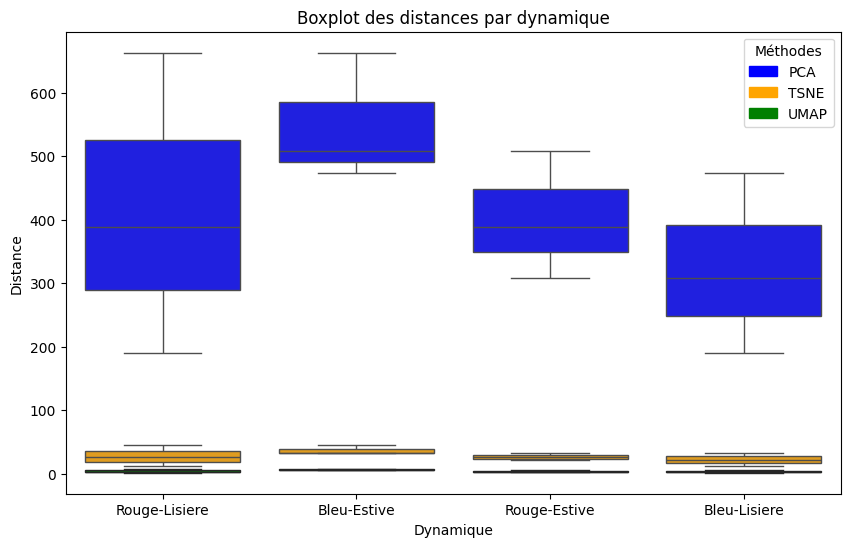

In [ ]:
box_plot(class_means_pca,class_means_tsne, class_means_umap)

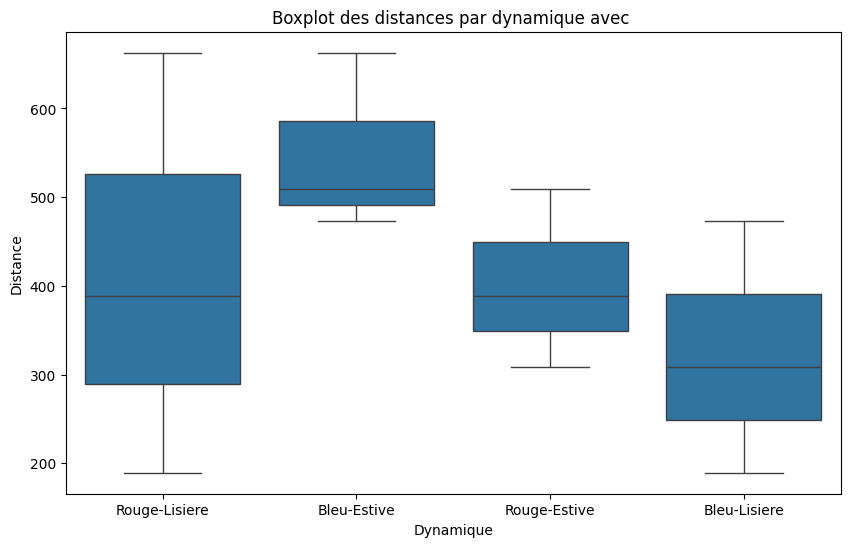

In [ ]:
# Boxplot avec Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dynamique', y='Distance', data=data)
plt.title('Boxplot des distances par dynamique avec ')
plt.show()


In [ ]:
palette_means = {}
for cl in df['target'].unique():
  if cl == 'Rouge-Lisiere':
    palette_means[cl] = 'red'
  elif cl == 'Bleu-Estive':
    palette_means[cl] = 'blue'
  elif cl == 'Rouge-Estive':
    palette_means[cl] = 'orange'
  elif cl == 'Bleu-Lisiere':
    palette_means[cl] = 'green'

In [ ]:
palette_means

{'Rouge-Lisiere': 'red',
 'Bleu-Estive': 'blue',
 'Rouge-Estive': 'orange',
 'Bleu-Lisiere': 'green'}

In [ ]:
list_df_acp[0]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V126,V127,V128,target,pca1,pca2,tsne1,tsne2,umap1,umap2
0,18,196,78,13,31,46,255,158,255,88,...,70,255,221,Rouge-Lisiere,-407.687777,-164.651234,-21.751020,-10.359217,11.090187,5.037369
1,0,218,93,11,16,36,255,153,255,58,...,0,255,248,Rouge-Lisiere,-377.826923,-245.221040,-20.593994,-11.331916,10.967743,5.235744
2,52,158,83,14,61,20,224,156,251,80,...,113,255,255,Rouge-Lisiere,-227.387787,-213.761733,-16.453438,-8.768308,10.351736,4.801446
3,0,223,64,41,0,3,255,137,255,42,...,1,255,127,Rouge-Lisiere,-338.215506,-347.408556,-19.805302,-12.340152,10.824907,5.356423
4,19,158,107,0,97,146,104,200,255,114,...,228,108,255,Rouge-Lisiere,-466.296650,309.571291,-34.597549,6.169157,12.460723,2.562643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,42,173,140,35,108,32,255,130,255,95,...,36,208,176,Rouge-Lisiere,-227.329553,136.324956,-23.042683,3.589759,11.002758,3.433353
330,50,140,170,13,132,43,180,179,239,155,...,70,227,187,Rouge-Lisiere,-267.876880,78.433751,-19.850016,4.050765,10.948236,3.475814
331,0,169,120,0,70,166,158,164,255,113,...,255,229,255,Rouge-Lisiere,-509.035168,288.867359,-37.017193,3.401525,12.863284,2.747260
332,10,189,134,24,90,38,233,168,255,108,...,7,255,100,Rouge-Lisiere,-285.759507,18.261501,-21.597113,2.587823,10.929071,3.532492


In [ ]:
from sklearn.utils import resample
# Fonction pour calculer l'intervalle de confiance par bootstrap
def bootstrap_confidence_interval(data, type_analysis, n_bootstrap=1000, confidence_level=0.95):
    bootstrap_means_x = []
    bootstrap_means_y = []

    for _ in range(n_bootstrap):
        # Bootstrap échantillonnage avec remplacement
        bootstrap_sample = resample(data)
        # print(bootstrap_sample)

        if type_analysis == "PCA":
          # Calcul de la moyenne pour cet échantillon bootstrap
          bootstrap_mean_x = np.mean(bootstrap_sample['pca1'])  # Première dimension (x)
          bootstrap_mean_y = np.mean(bootstrap_sample['pca2'])  # Deuxième dimension (y)
        elif type_analysis == "TSNE":
          # Calcul de la moyenne pour cet échantillon bootstrap
          bootstrap_mean_x = np.mean(bootstrap_sample['tsne1'])  # Première dimension (x)
          bootstrap_mean_y = np.mean(bootstrap_sample['tsne2'])  # Deuxième dimension (y)
        elif type_analysis == "UMAP":
          # Calcul de la moyenne pour cet échantillon bootstrap
          bootstrap_mean_x = np.mean(bootstrap_sample['umap1'])  # Première dimension (x)
          bootstrap_mean_y = np.mean(bootstrap_sample['umap2'])  # Deuxième dimension (y)


        bootstrap_means_x.append(bootstrap_mean_x)
        bootstrap_means_y.append(bootstrap_mean_y)

    # Calcul des intervalles de confiance pour x et y
    lower_bound_x = np.percentile(bootstrap_means_x, (1 - confidence_level) / 2 * 100)
    upper_bound_x = np.percentile(bootstrap_means_x, (1 + confidence_level) / 2 * 100)

    lower_bound_y = np.percentile(bootstrap_means_y, (1 - confidence_level) / 2 * 100)
    upper_bound_y = np.percentile(bootstrap_means_y, (1 + confidence_level) / 2 * 100)

    print("x:", lower_bound_x, "->", upper_bound_x, "| y:", lower_bound_y, "->", upper_bound_y)
    return [[lower_bound_x, upper_bound_x], [lower_bound_y, upper_bound_y]]

# Calcul des intervalles de confiance pour chaque cluster dans chaque analyse
list_pca_ci = []
list_tsne_ci = []
list_umap_ci = []

for i in range(len(list_df_acp)):
  print('----------------------------------------- \n PCA')
  pca_ci = bootstrap_confidence_interval(list_df_acp[i], "PCA")
  list_pca_ci.append(pca_ci)
  print('----------------------------------------- \n TSNE')
  tsne_ci = bootstrap_confidence_interval(list_df_tsne[i], "TSNE")
  list_tsne_ci.append(tsne_ci)
  print('----------------------------------------- \n UMAP')
  umap_ci = bootstrap_confidence_interval(list_df_umap[i], "UMAP")
  list_umap_ci.append(umap_ci)


----------------------------------------- 
 PCA
x: -257.66137076705434 -> -220.66096435454017 | y: 70.99492497573635 -> 111.14447785428816
----------------------------------------- 
 TSNE
x: -18.28583679199219 -> -15.896832180023194 | y: 2.6035148024559023 -> 4.632596957683563
----------------------------------------- 
 UMAP
x: 10.166804599761964 -> 10.501113843917846 | y: 3.0788945496082305 -> 3.3081019699573515
----------------------------------------- 
 PCA
x: 401.9816919218545 -> 444.36231854894623 | y: 72.51285542274272 -> 121.11156655309324
----------------------------------------- 
 TSNE
x: 27.770216512680054 -> 29.80056562423706 | y: 6.563313829898834 -> 9.066304540634155
----------------------------------------- 
 UMAP
x: 2.4974745154380797 -> 2.882437598705292 | y: 4.282829642295837 -> 4.556813657283783
----------------------------------------- 
 PCA
x: -4.290282281847652 -> 34.53731585133949 | y: -225.7420369724603 -> -177.91906410731372
-------------------------------------

In [ ]:
pca_ci

[[-120.77720114653268, 21.908415118070522],
 [49.59167186239431, 155.45611075282724]]

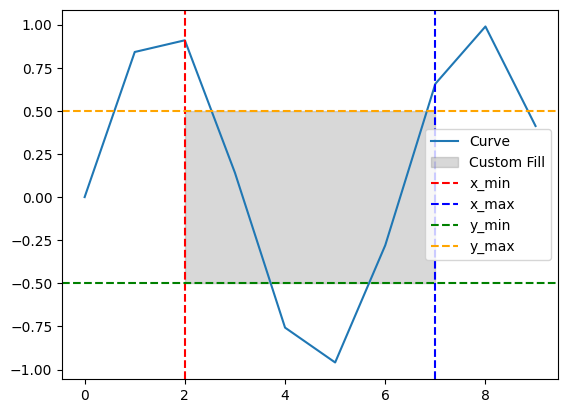

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Exemple de données
# x_values = np.arange(10)
# y_values = np.sin(x_values)

# # Définir des limites personnalisées
# x_min = 2
# x_max = 7
# y_min = -0.5
# y_max = 0.5

# # Tracer la courbe
# plt.plot(x_values, y_values, label='Curve')

# # Remplissage personnalisé
# plt.fill_between(x_values, y_min, y_max, where=(x_values >= x_min) & (x_values <= x_max), color='gray', alpha=0.3, label='Custom Fill')

# # Marquer les limites avec des lignes verticales
# plt.axvline(x=x_min, color='red', linestyle='--', label='x_min')
# plt.axvline(x=x_max, color='blue', linestyle='--', label='x_max')
# plt.axhline(y=y_min, color='green', linestyle='--', label='y_min')
# plt.axhline(y=y_max, color='orange', linestyle='--', label='y_max')

# plt.legend()
# plt.show()


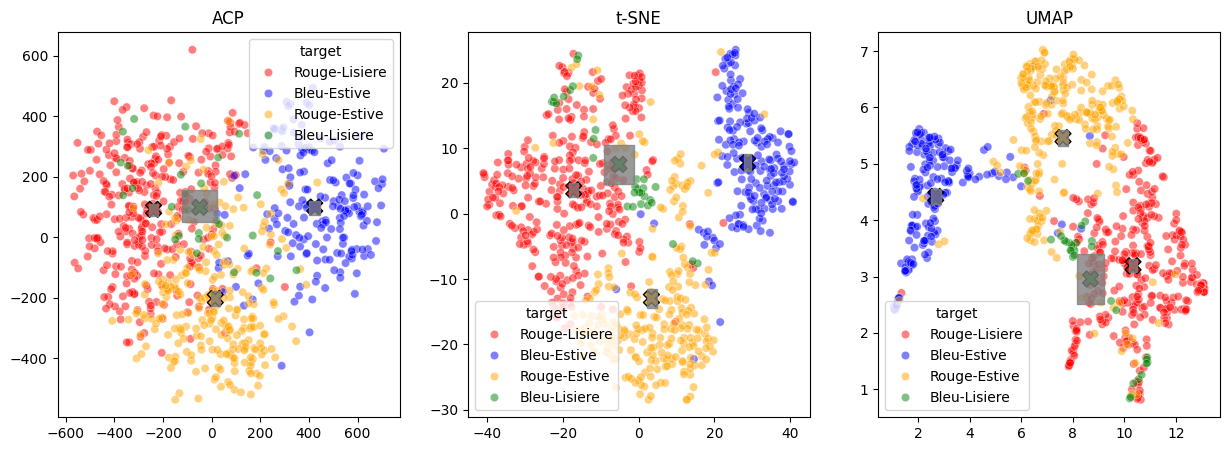

In [ ]:
# Représentation graphique
plt.figure(figsize=(15, 5))

# ACP
plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['target'], palette = palette_means, alpha=0.5)
plt.scatter(class_means_pca[:, 0], class_means_pca[:, 1], c= [palette_means[cl] for cl in df['target'].unique()], marker='X', s=130, label='Moyennes de classe', edgecolors='black')
for i in range(len(list_pca_ci)):
  pca_ci = list_pca_ci[i]
  x_min = pca_ci[0][0]
  x_max = pca_ci[0][1]
  # x_values = pca_ci[0][1] - pca_ci[0][0]
  x_values = np.linspace(pca_ci[0][0], pca_ci[0][1], num=100)
  y_min = pca_ci[1][0]
  y_max = pca_ci[1][1]
  plt.fill_between(x_values, y_min, y_max, where=(x_values >= x_min) & (x_values <= x_max), color='gray', alpha=0.8)
# plt.fill_between(np.arange(len(class_means_pca)), pca_ci[0], pca_ci[1], color='gray', alpha=0.3, label='Intervalle de confiance (95%)')
plt.title('ACP')

# t-SNE
plt.subplot(1, 3, 2)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['target'], palette = palette_means, alpha=0.5)
plt.scatter(class_means_tsne[:, 0], class_means_tsne[:, 1], c= [palette_means[cl] for cl in df['target'].unique()], marker='X', s=130, label='Moyennes de classe', edgecolors='black')
for i in range(len(list_tsne_ci)):
  tsne_ci = list_tsne_ci[i]
  x_min = tsne_ci[0][0]
  x_max = tsne_ci[0][1]
  # x_values = tsne_ci[0][1] - tsne_ci[0][0]
  x_values = np.linspace(tsne_ci[0][0], tsne_ci[0][1], num=100)
  y_min = tsne_ci[1][0]
  y_max = tsne_ci[1][1]
  plt.fill_between(x_values, y_min, y_max, where=(x_values >= x_min) & (x_values <= x_max), color='gray', alpha=0.8)
plt.title('t-SNE')

# UMAP
plt.subplot(1, 3, 3)
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=df['target'], palette = palette_means, alpha=0.5)
plt.scatter(class_means_umap[:, 0], class_means_umap[:, 1], c= [palette_means[cl] for cl in df['target'].unique()], marker='X', s=130, label='Moyennes de classe', edgecolors='black')
for i in range(len(list_umap_ci)):
  umap_ci = list_umap_ci[i]
  x_min = umap_ci[0][0]
  x_max = umap_ci[0][1]
  # x_values = umap_ci[0][1] - umap_ci[0][0]
  x_values = np.linspace(umap_ci[0][0], umap_ci[0][1], num=100)
  y_min = umap_ci[1][0]
  y_max = umap_ci[1][1]
  plt.fill_between(x_values, y_min, y_max, where=(x_values >= x_min) & (x_values <= x_max), color='gray', alpha=0.8)
plt.title('UMAP')



plt.savefig("/content/gdrive/MyDrive/Valeurs acoustiques/2022/Antras_Isard/Colored_VGGish_acp_tsne_umap_L_E_B_R_with_means_for_each_cluster.png")
# plt.savefig("/content/gdrive/MyDrive/Valeurs acoustiques/2022/Ustou_Guzet-Neige/Colored_VGGish_acp_tsne_umap_L_E_B_R_with_means_for_each_cluster.png")
plt.show()

In [ ]:
df.head(2).T

,0,1
Dynamique,Rouge,Bleu
Distance,1.2,0.8


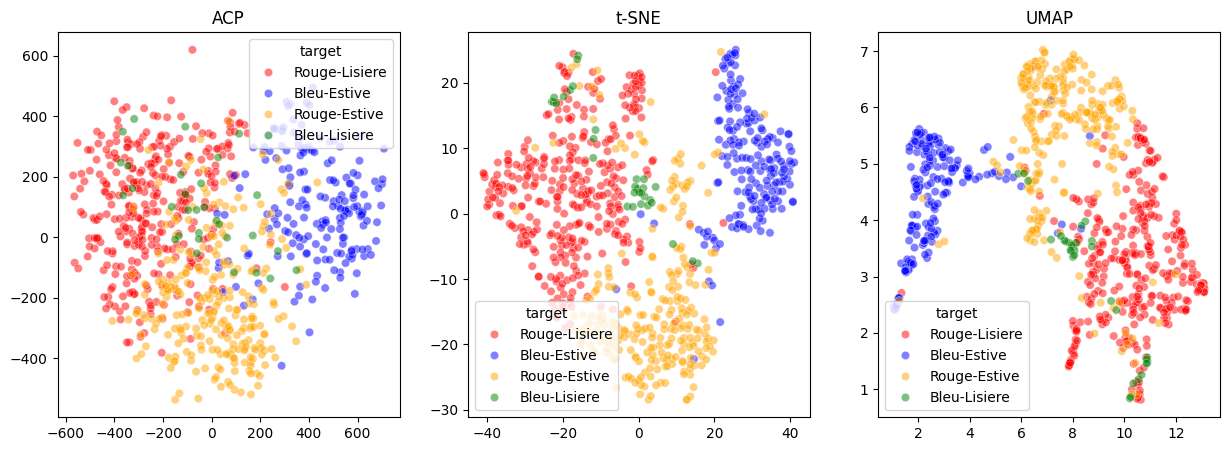

In [ ]:

# Affichage des résultats
plt.figure(figsize=(15, 5))

# ACP
plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['target'], palette = palette_means, alpha=0.5)
plt.title('ACP')

# t-SNE
plt.subplot(1, 3, 2)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['target'], palette = palette_means, alpha=0.5)
plt.title('t-SNE')

# UMAP
plt.subplot(1, 3, 3)
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=df['target'], palette = palette_means, alpha=0.5)
plt.title('UMAP')

plt.savefig("/content/gdrive/MyDrive/Valeurs acoustiques/2022/Antras_Isard/Colored_VGGish_acp_tsne_umap_L_E_B_R.png")
# plt.savefig("/content/gdrive/MyDrive/Valeurs acoustiques/2022/Ustou_Guzet-Neige/Colored_VGGish_acp_tsne_umap_L_E_B_R.png")
plt.show()

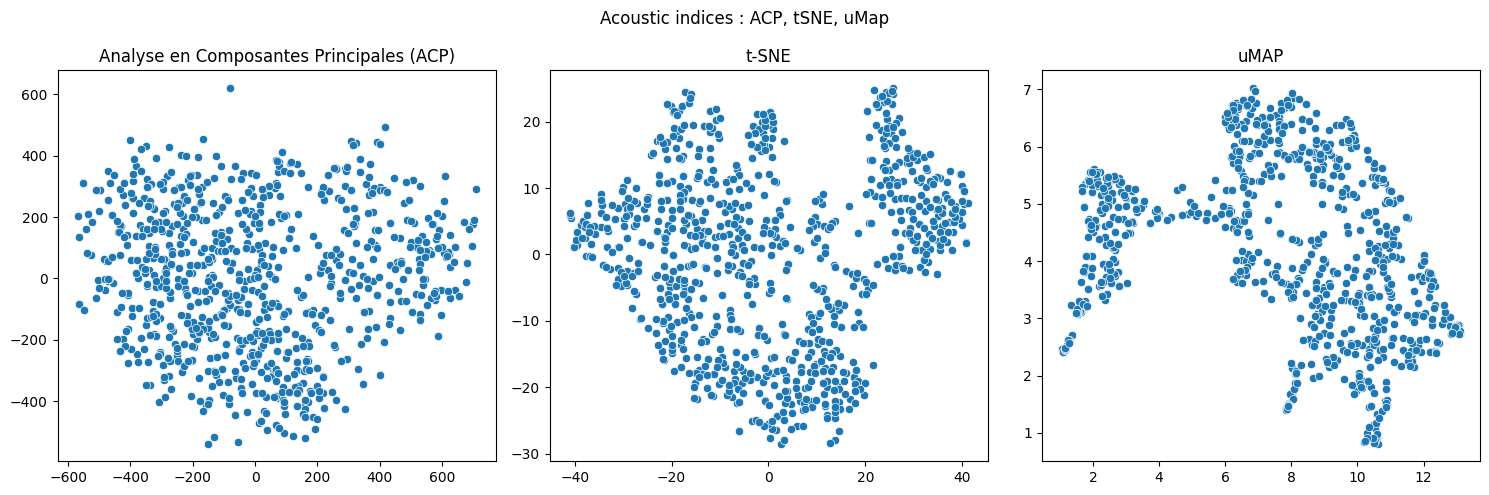

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un tracé avec 3 sous-tracés (subplots)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Affichage des résultats de l'ACP sur le premier subplot
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=axes[0])
axes[0].set_title('Analyse en Composantes Principales (ACP)')

# Affichage des résultats de t-SNE sur le deuxième subplot
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], ax=axes[1])
axes[1].set_title('t-SNE')

# Affichage des résultats de uMAP sur le troisième subplot
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1], ax=axes[2])
axes[2].set_title('uMAP')

# Ajouter un titre global au tracé
plt.suptitle('Acoustic indices : ACP, tSNE, uMap')

# Afficher le tracé avec les sous-tracés
plt.tight_layout()
plt.savefig("/content/gdrive/MyDrive/Valeurs acoustiques/2022/Antras_Isard/VGGish_acp_tsne_umap_L_E_B_R.png")
# plt.savefig("/content/gdrive/MyDrive/Valeurs acoustiques/2022/Ustou_Guzet-Neige/VGGish_acp_tsne_umap_L_E_B_R.png")
plt.show()